In [1]:
# import all the required librabies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,roc_auc_score
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [3]:
df.shape

(5681, 11)

In [4]:
df1 = pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv")
df1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [5]:
df1.shape

(8523, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [9]:
df1.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [10]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [11]:
df1.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [12]:
#filling missing values
#df['Item_Identifier'].fillna(df['Item_Identifier'].mode()[0],inplace=True)
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)
mode_of_Outlet_size = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
miss_values = df['Outlet_Size'].isnull()  
df.loc[miss_values, 'Outlet_Size'] = df.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                5681 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [15]:
df1['Item_Weight'].fillna(df1['Item_Weight'].mean(),inplace=True)
mode_of_Outlet_size = df1.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
miss_values = df1['Outlet_Size'].isnull()  
df1.loc[miss_values, 'Outlet_Size'] = df1.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [17]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.245189,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,9.195000,0.027047,94.412000,1987.000000
50%,12.695633,0.054154,141.415400,1999.000000
75%,15.850000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [18]:
df1.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [19]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

<AxesSubplot:xlabel='Item_Identifier', ylabel='count'>

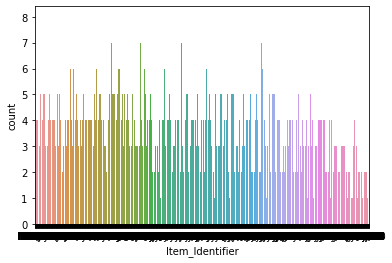

In [20]:
sns.countplot(df['Item_Identifier'])

<AxesSubplot:xlabel='Item_Identifier', ylabel='count'>

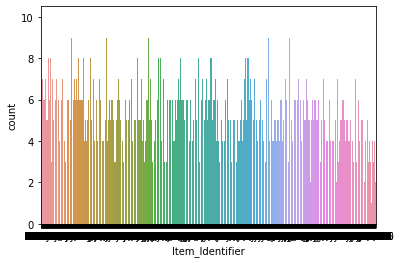

In [21]:
sns.countplot(df1['Item_Identifier'])

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

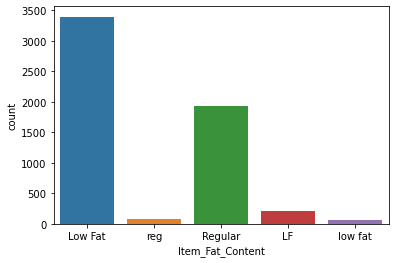

In [22]:
sns.countplot(df['Item_Fat_Content'])

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

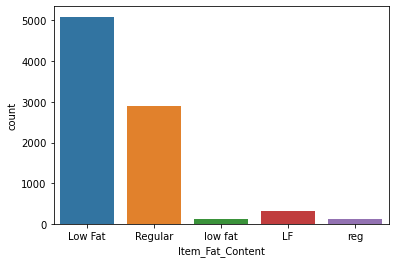

In [23]:
sns.countplot(df1['Item_Fat_Content'])

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

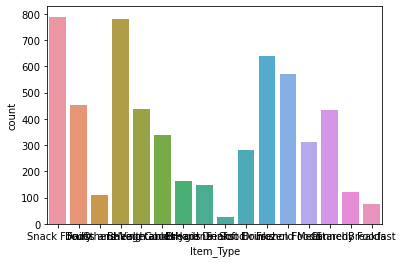

In [24]:
sns.countplot(df['Item_Type'])

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

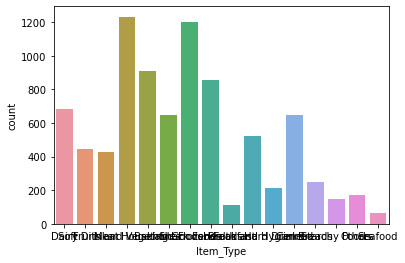

In [25]:
sns.countplot(df1['Item_Type'])

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='count'>

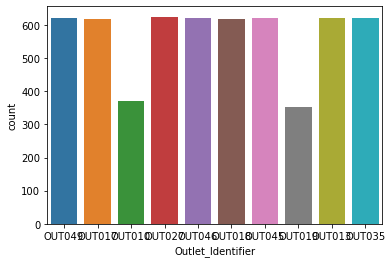

In [26]:
sns.countplot(df['Outlet_Identifier'])

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='count'>

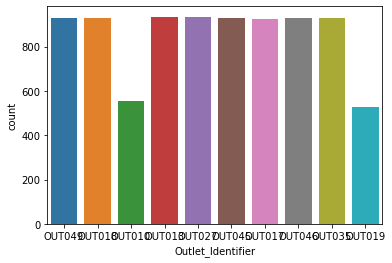

In [27]:
sns.countplot(df1['Outlet_Identifier'])

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

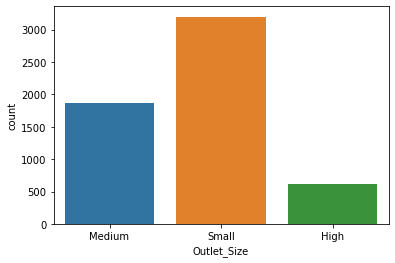

In [28]:
sns.countplot(df['Outlet_Size'])

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

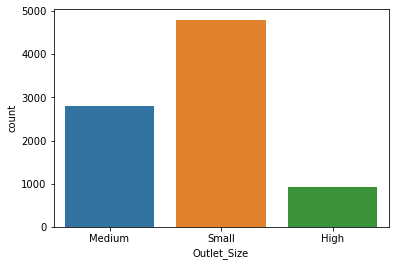

In [29]:
sns.countplot(df1['Outlet_Size'])

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

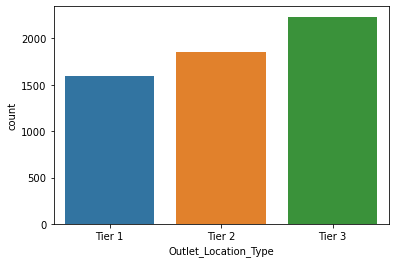

In [30]:
sns.countplot(df['Outlet_Location_Type'])

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

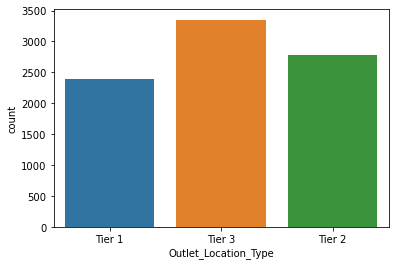

In [31]:
sns.countplot(df1['Outlet_Location_Type'])

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

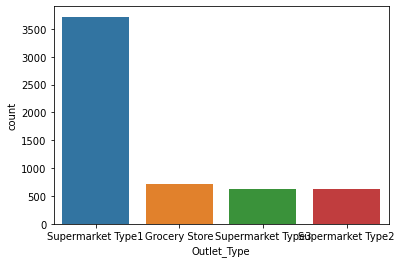

In [32]:
sns.countplot(df['Outlet_Type'])

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

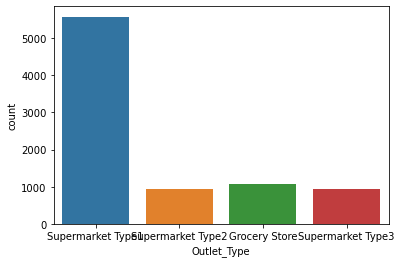

In [33]:
sns.countplot(df1['Outlet_Type'])

In [34]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [39]:
df1.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

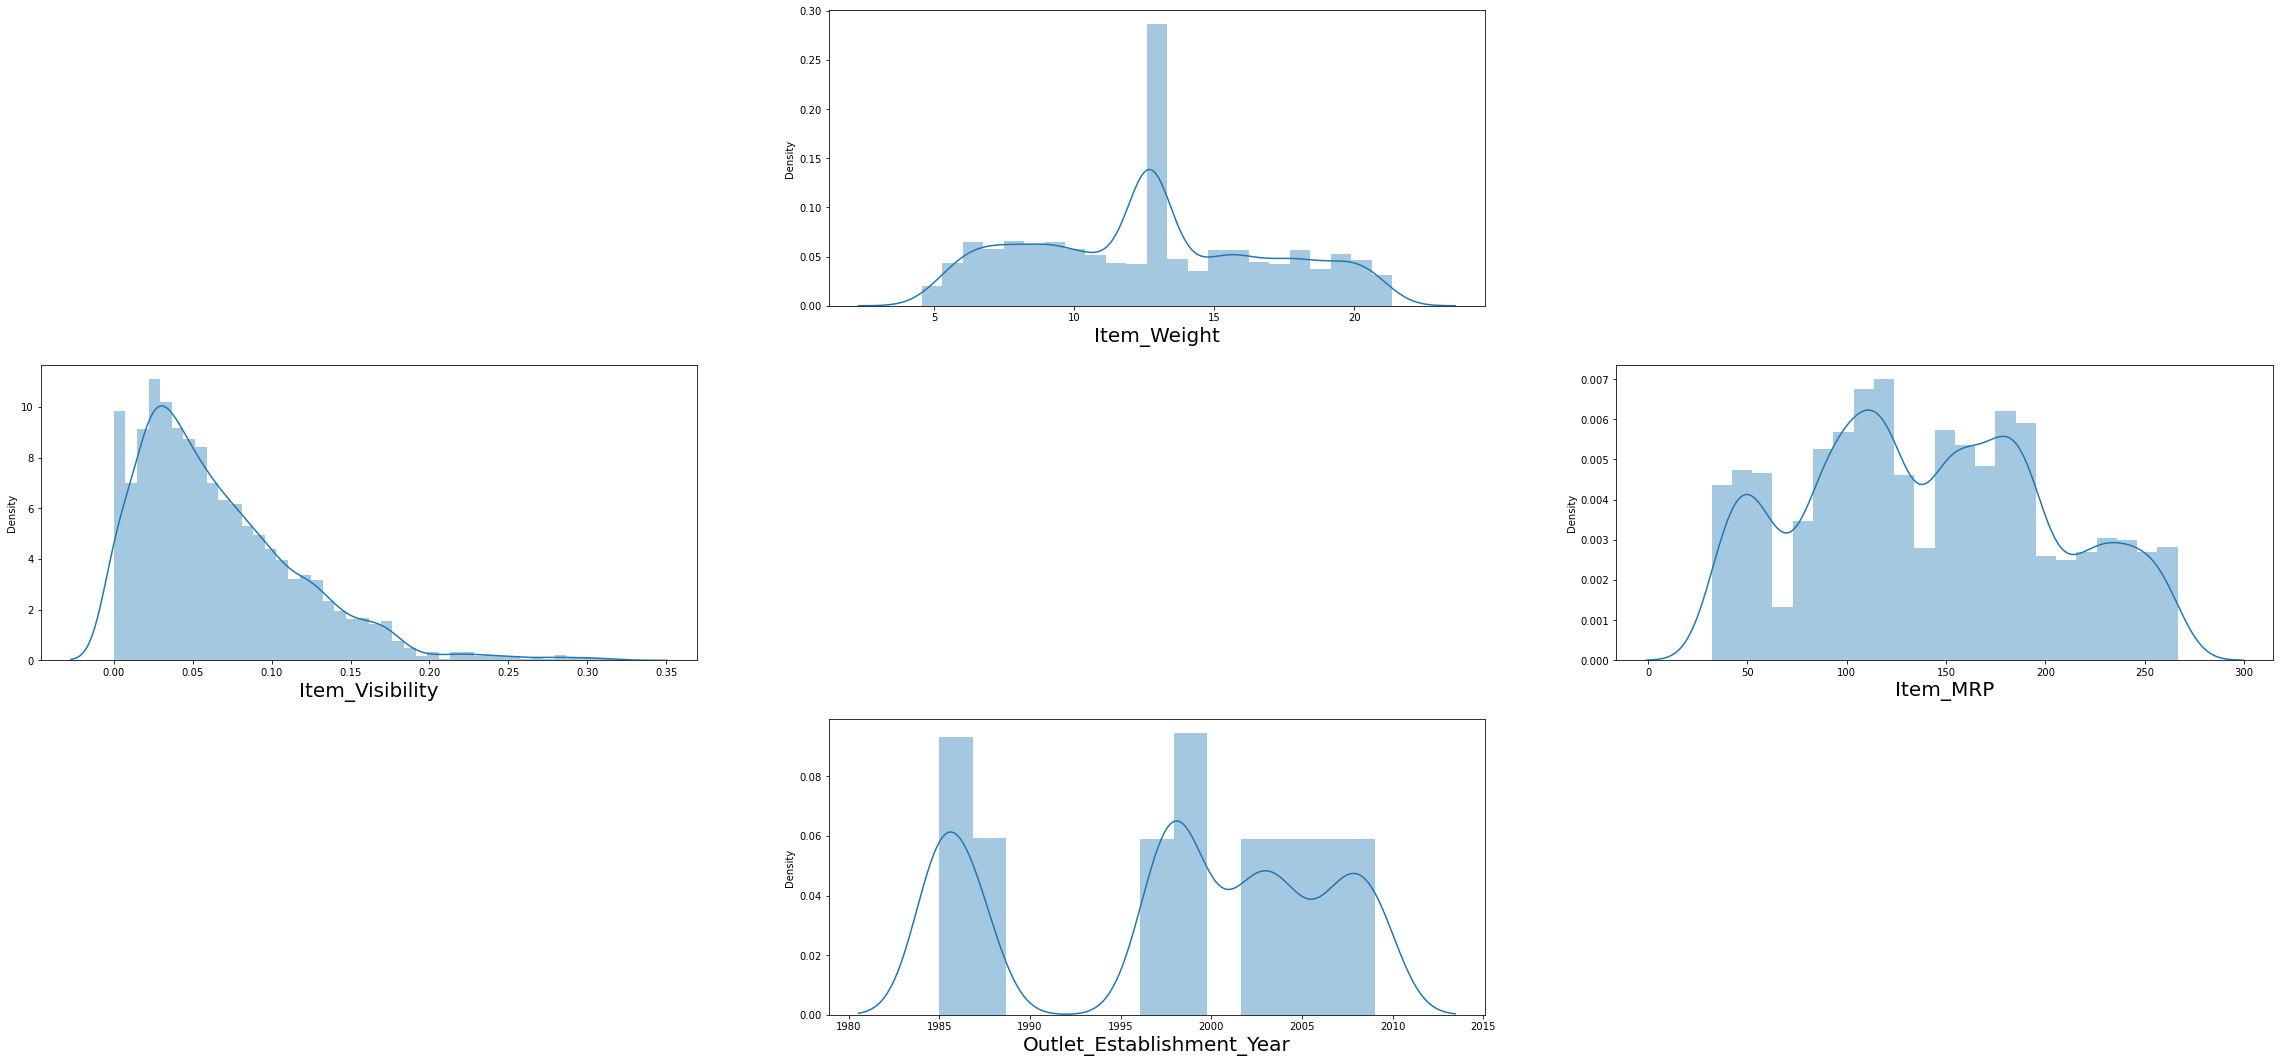

In [35]:
#plotting distribution plot for my dataframe to check and remove outliers
plt.figure(figsize=(40,25),facecolor="white")
plotnumber = 1

for column in df:
    
    if(df[column].dtype == np.float64 or df[column].dtype == np.int64):
        if plotnumber<=12:
            ax = plt.subplot(4,3,plotnumber)
            sns.distplot(df[column])
            plt.xlabel(column,fontsize=20)
       
    plotnumber +=1
plt.show()

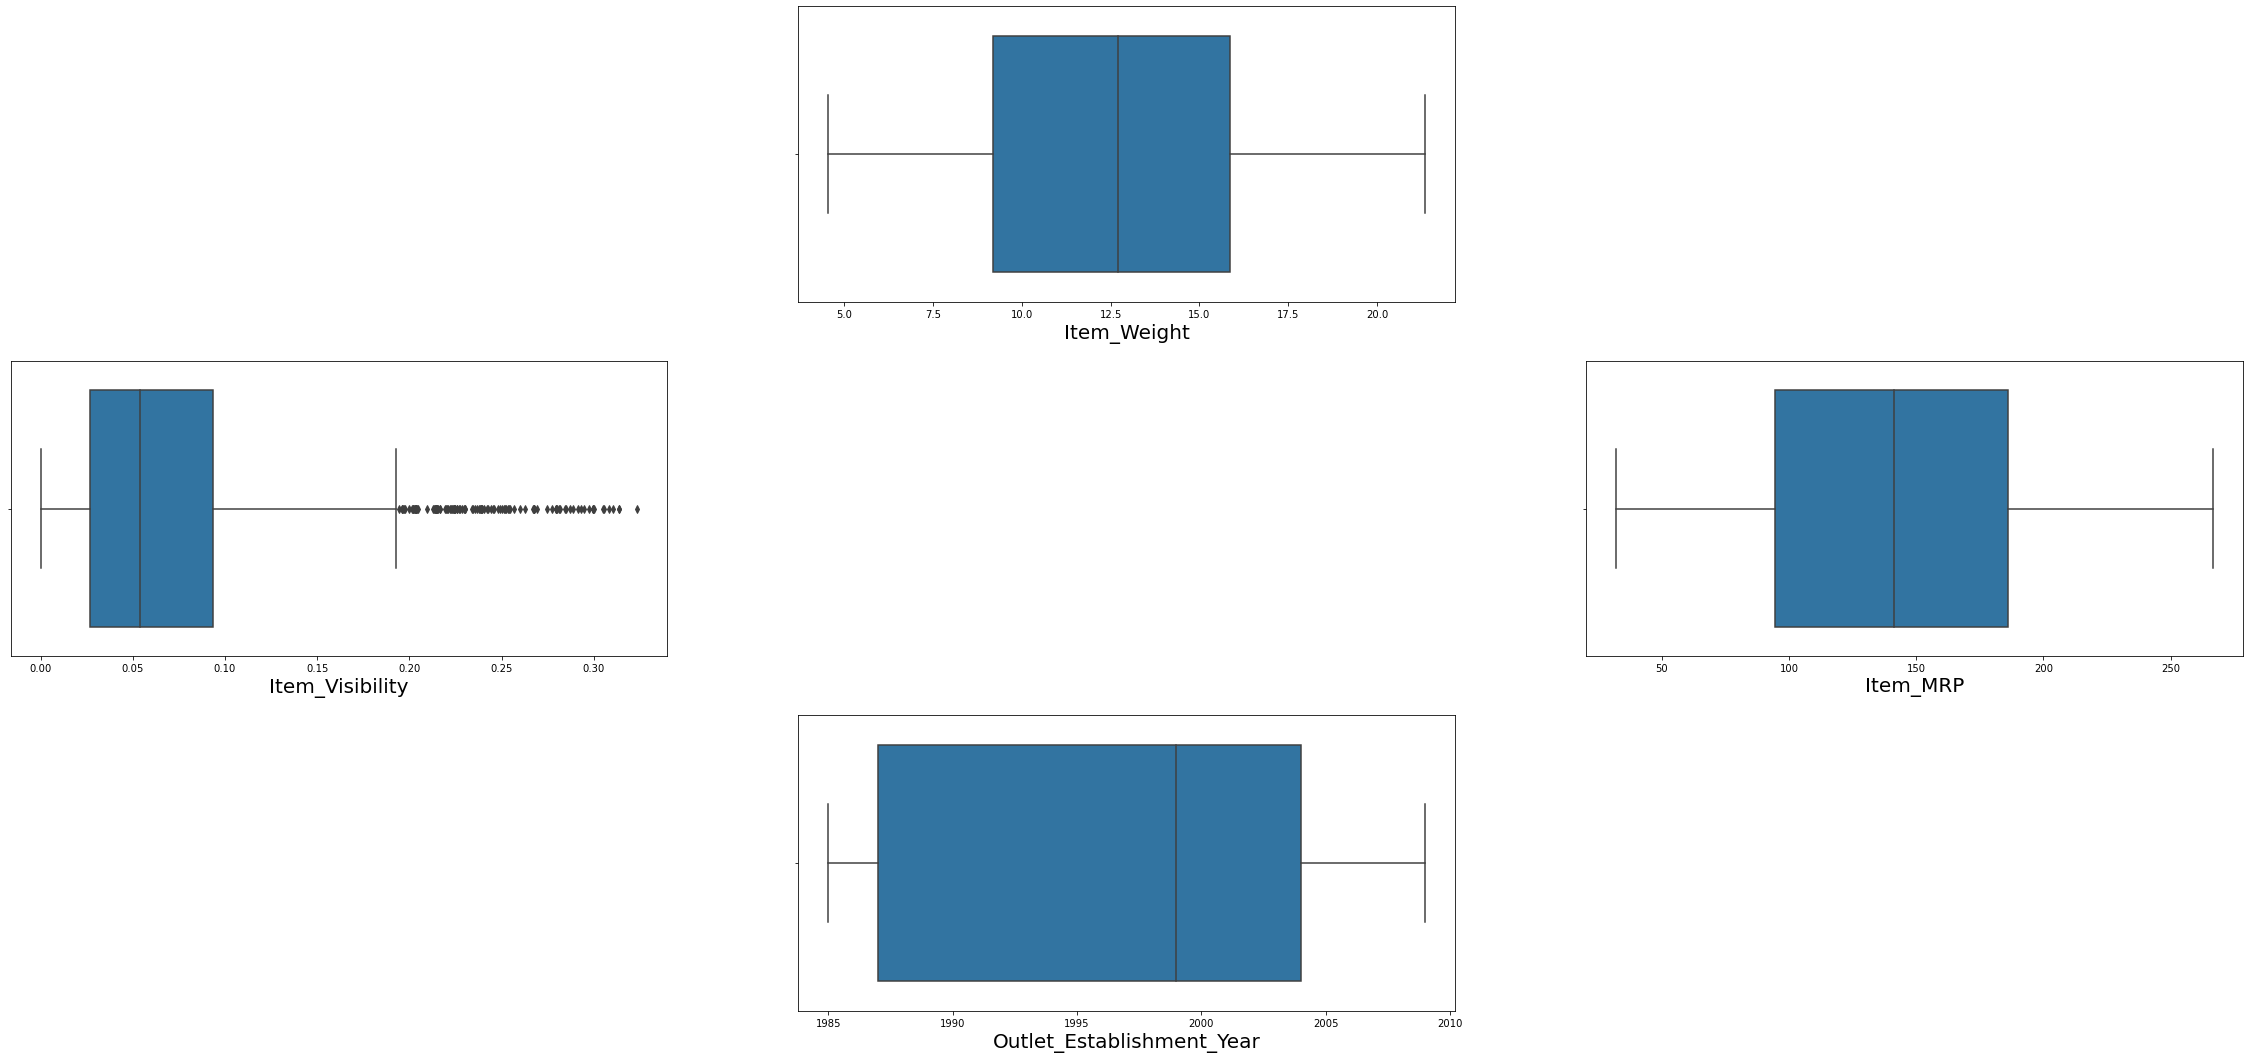

In [36]:
#plotting distribution plot for my dataframe to check and remove outliers
plt.figure(figsize=(40,25),facecolor="white")
plotnumber = 1

for column in df:
    
    if(df[column].dtype == np.float64 or df[column].dtype == np.int64):
        if plotnumber<=12:
            ax = plt.subplot(4,3,plotnumber)
            sns.boxplot(df[column])
            plt.xlabel(column,fontsize=20)
       
    plotnumber +=1
plt.show()

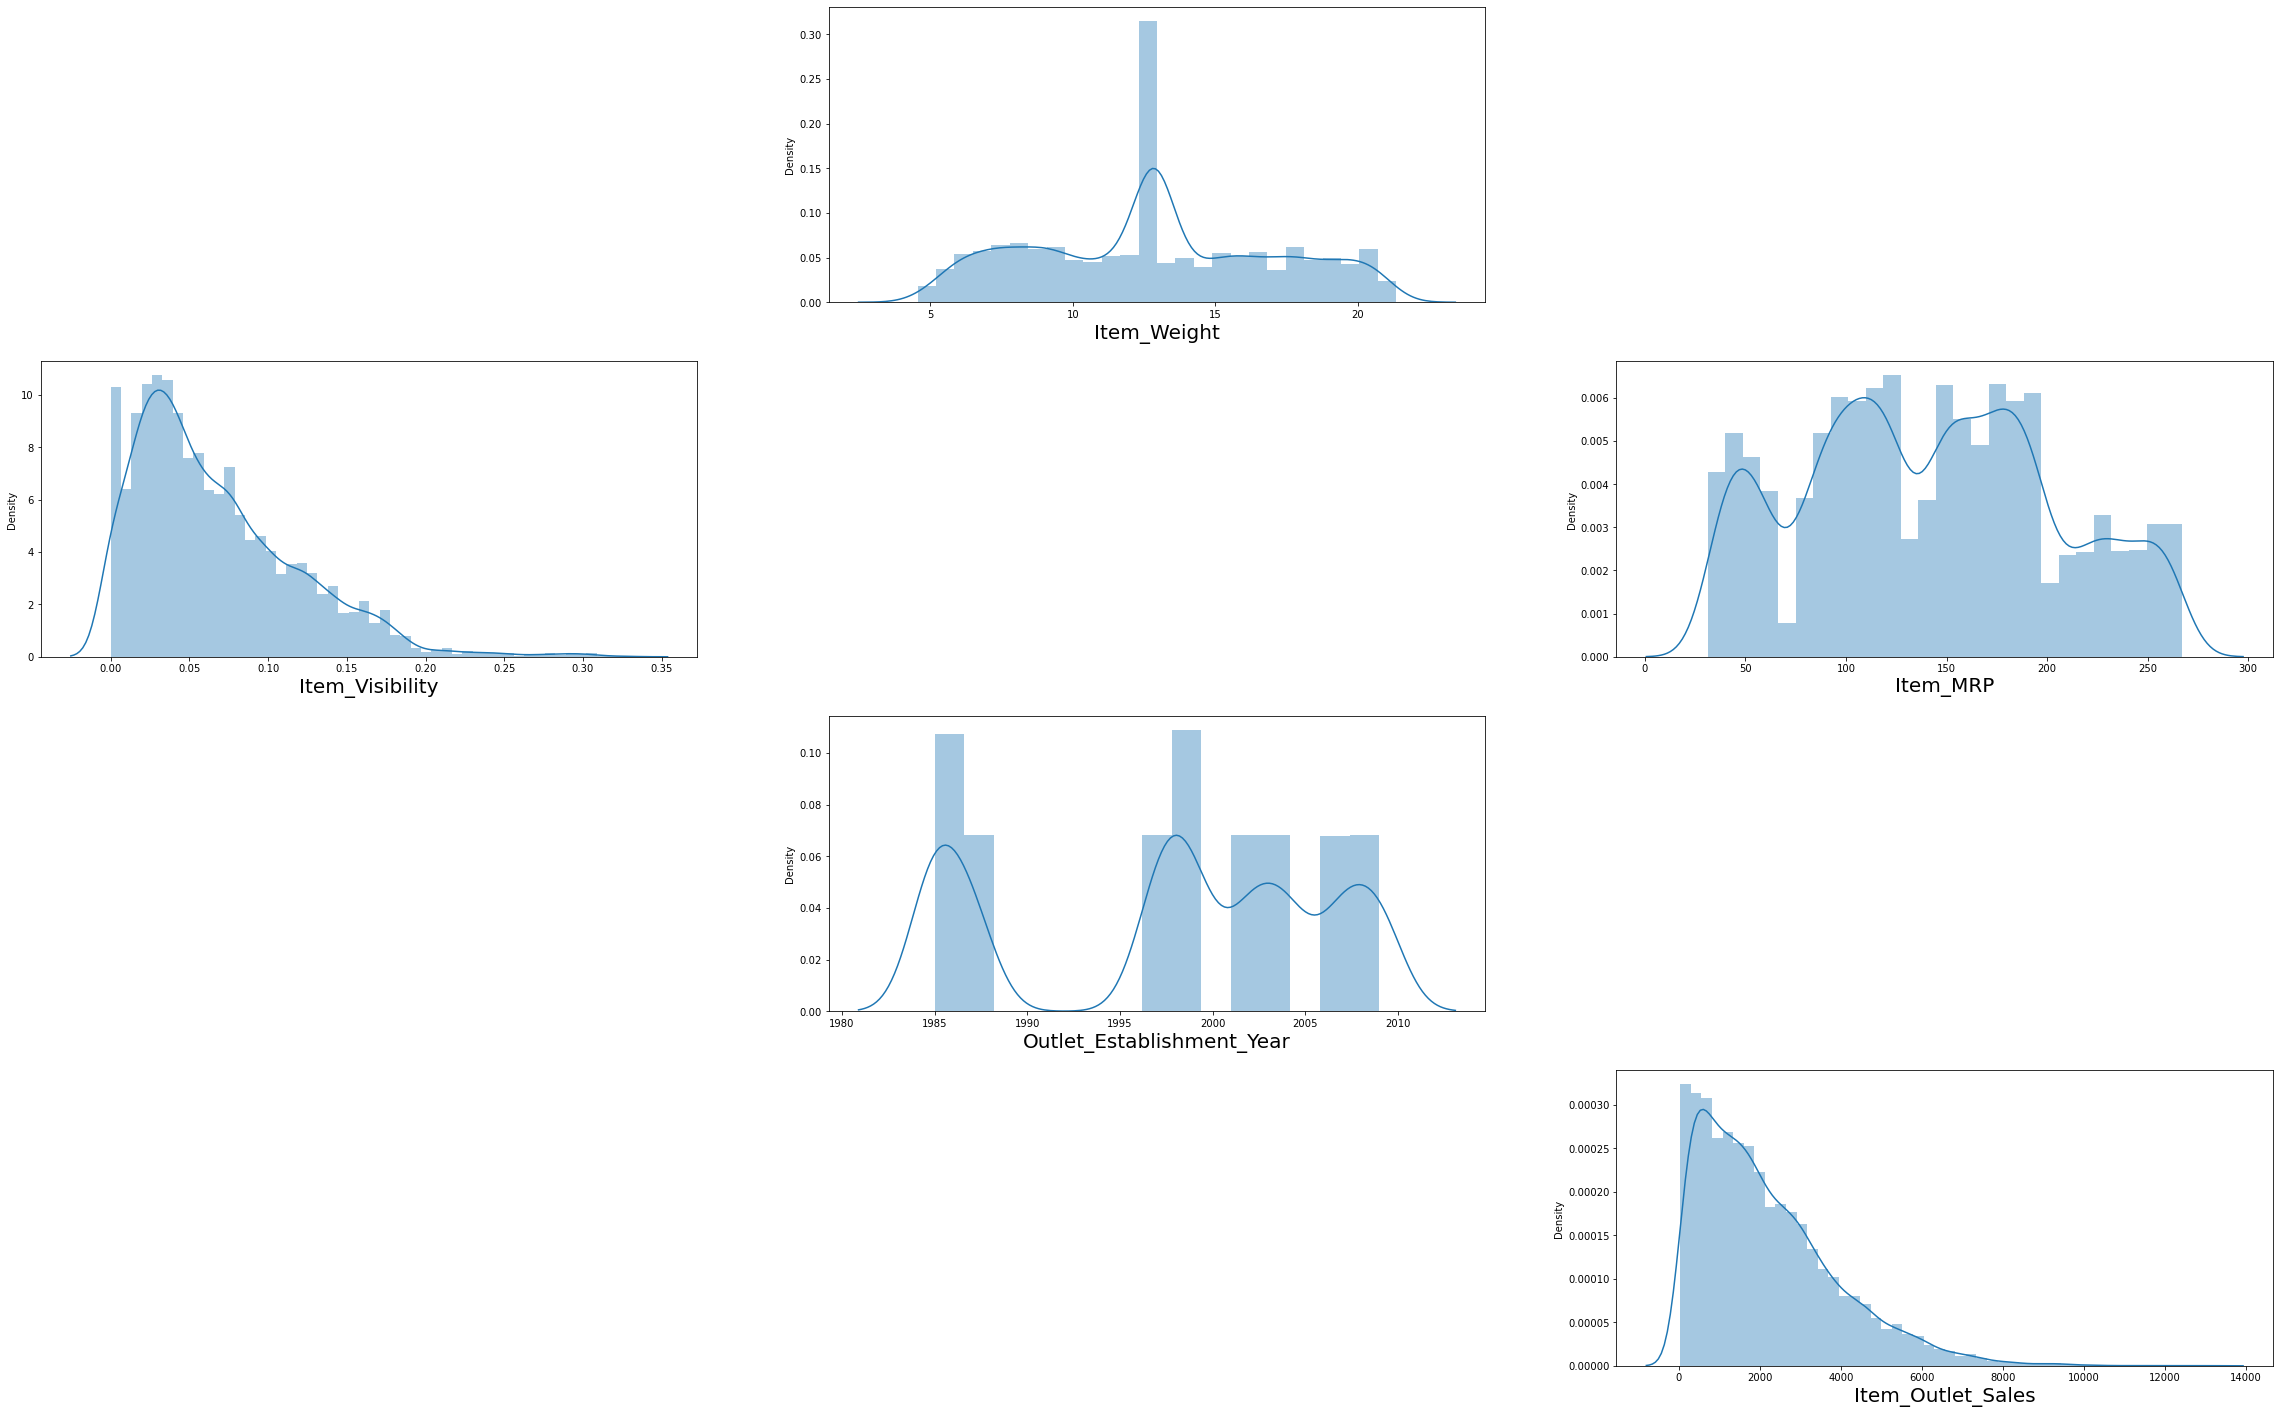

In [41]:
#plotting distribution plot for my dataframe to check and remove outliers
plt.figure(figsize=(40,25),facecolor="white")
plotnumber = 1

for column in df1:
    
    if(df1[column].dtype == np.float64 or df1[column].dtype == np.int64):
        if plotnumber<=12:
            ax = plt.subplot(4,3,plotnumber)
            sns.distplot(df1[column])
            plt.xlabel(column,fontsize=20)
       
    plotnumber +=1
plt.show()

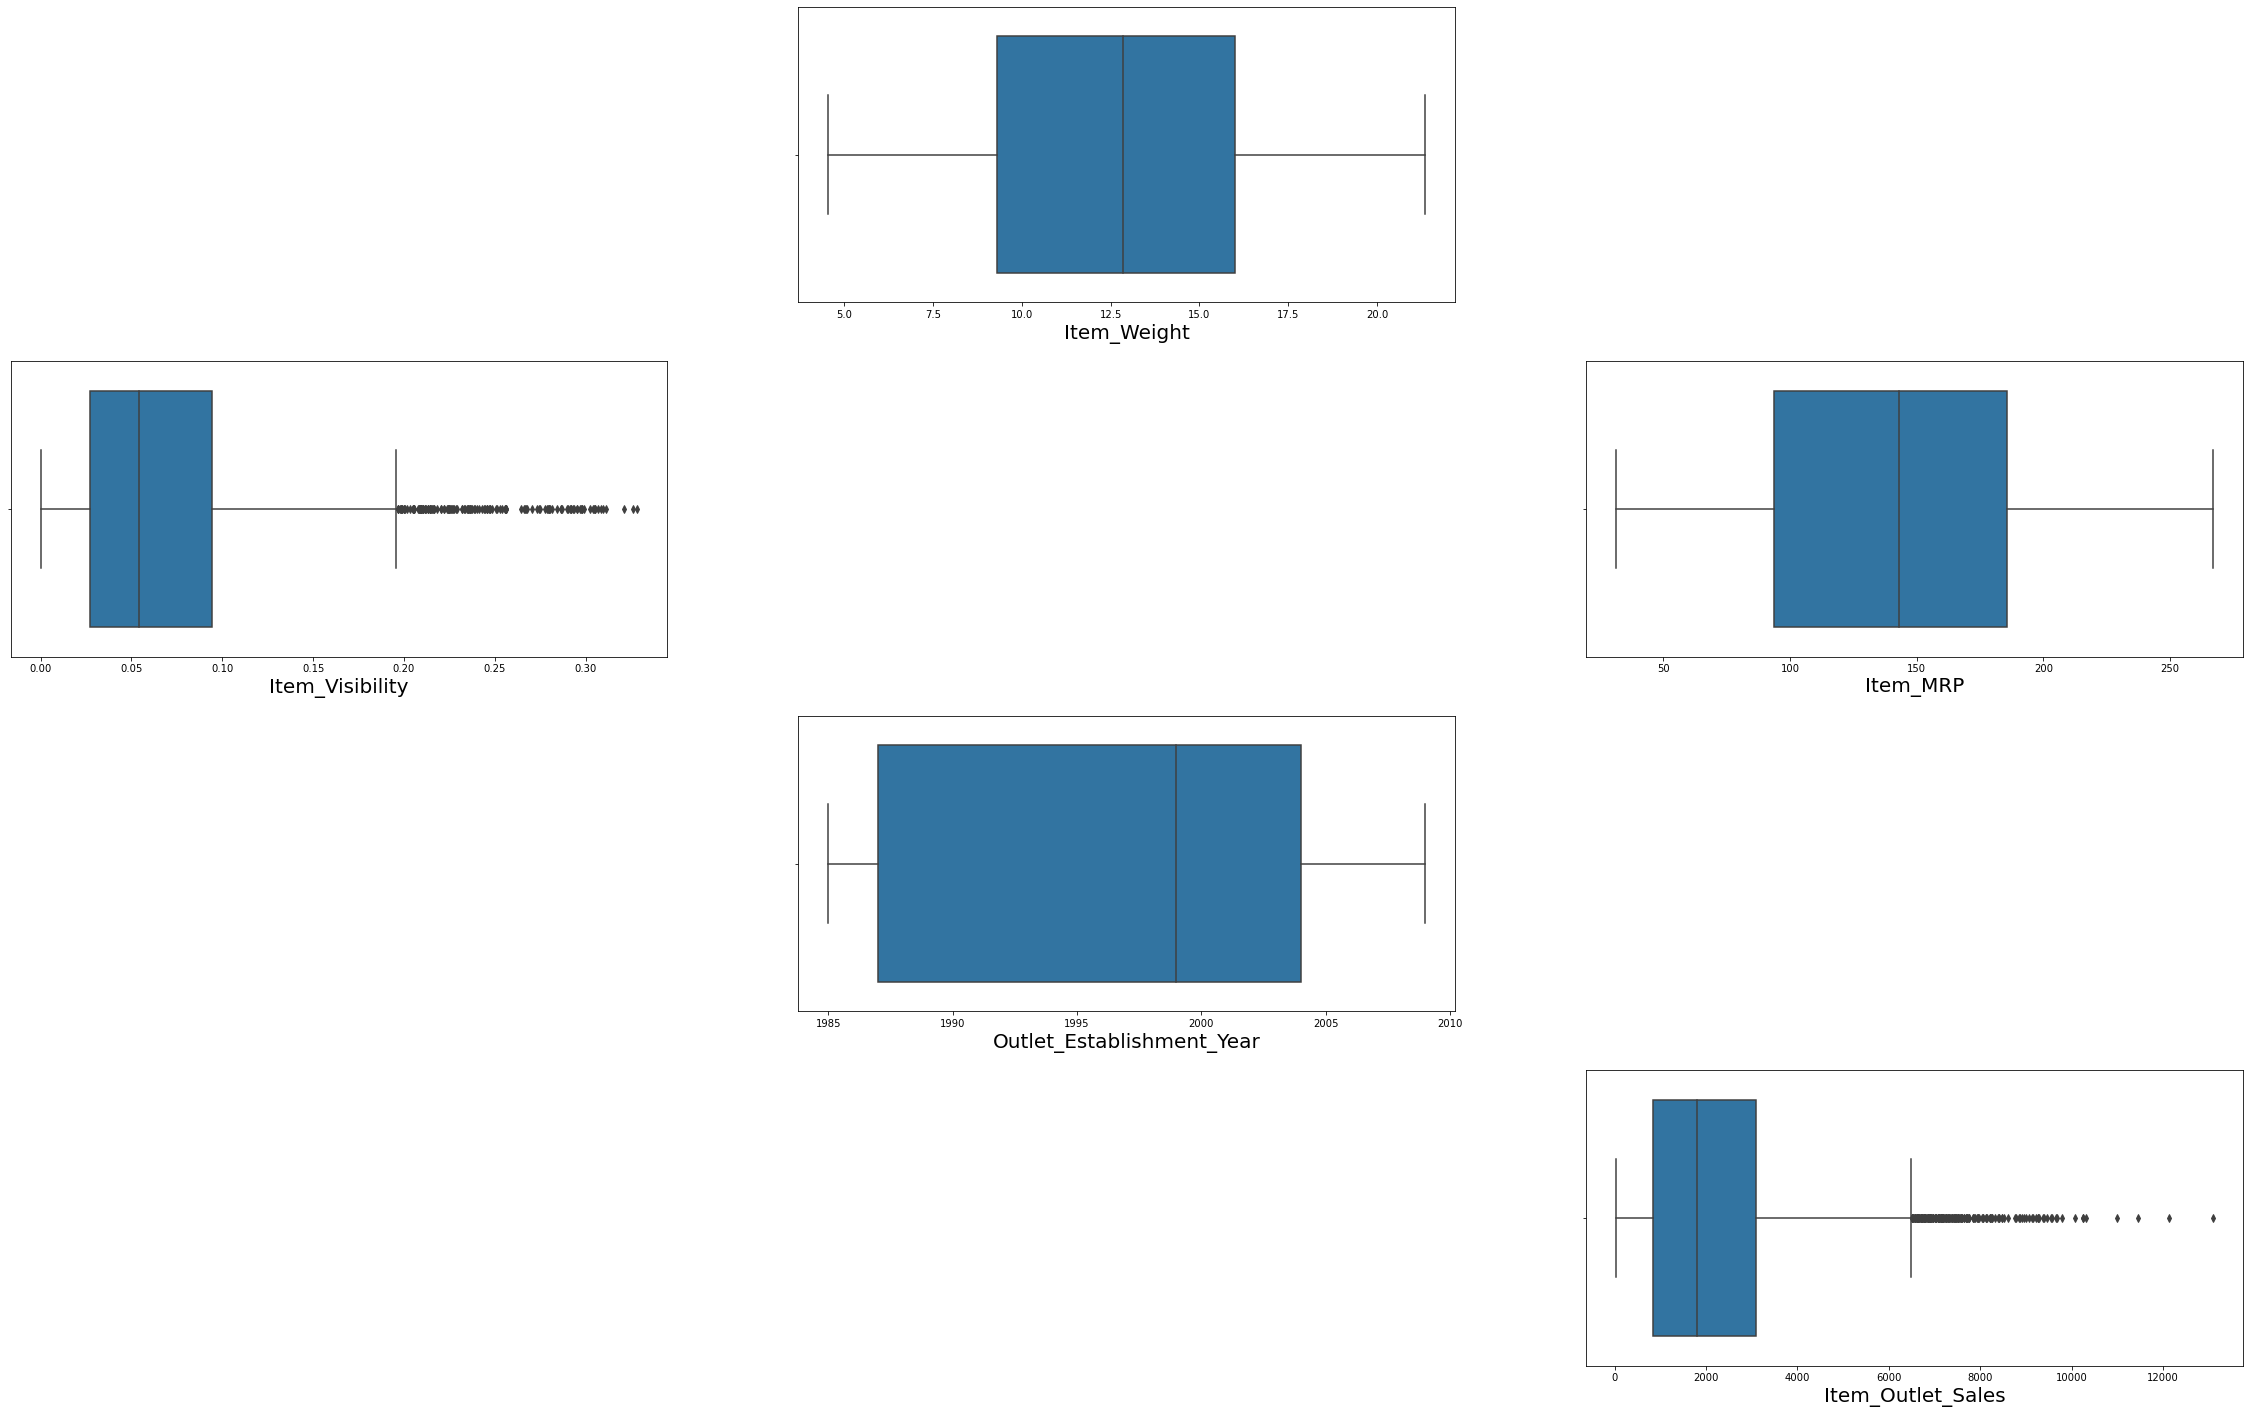

In [43]:
#plotting distribution plot for my dataframe to check and remove outliers
plt.figure(figsize=(40,25),facecolor="white")
plotnumber = 1

for column in df1:
    
    if(df1[column].dtype == np.float64 or df1[column].dtype == np.int64):
        if plotnumber<=12:
            ax = plt.subplot(4,3,plotnumber)
            sns.boxplot(df1[column])
            plt.xlabel(column,fontsize=20)
       
    plotnumber +=1
plt.show()

In [44]:
#just to check correlation of the data between features
corr_mat = df.corr()
corr_mat

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
Item_Weight,1.000000,-0.016380,0.045257,0.013548
Item_Visibility,-0.016380,1.000000,-0.014013,-0.097040
Item_MRP,0.045257,-0.014013,1.000000,-0.007233
Outlet_Establishment_Year,0.013548,-0.097040,-0.007233,1.000000


In [45]:
#just to check correlation of the data between features
corr_mat1 = df1.corr()
corr_mat1

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

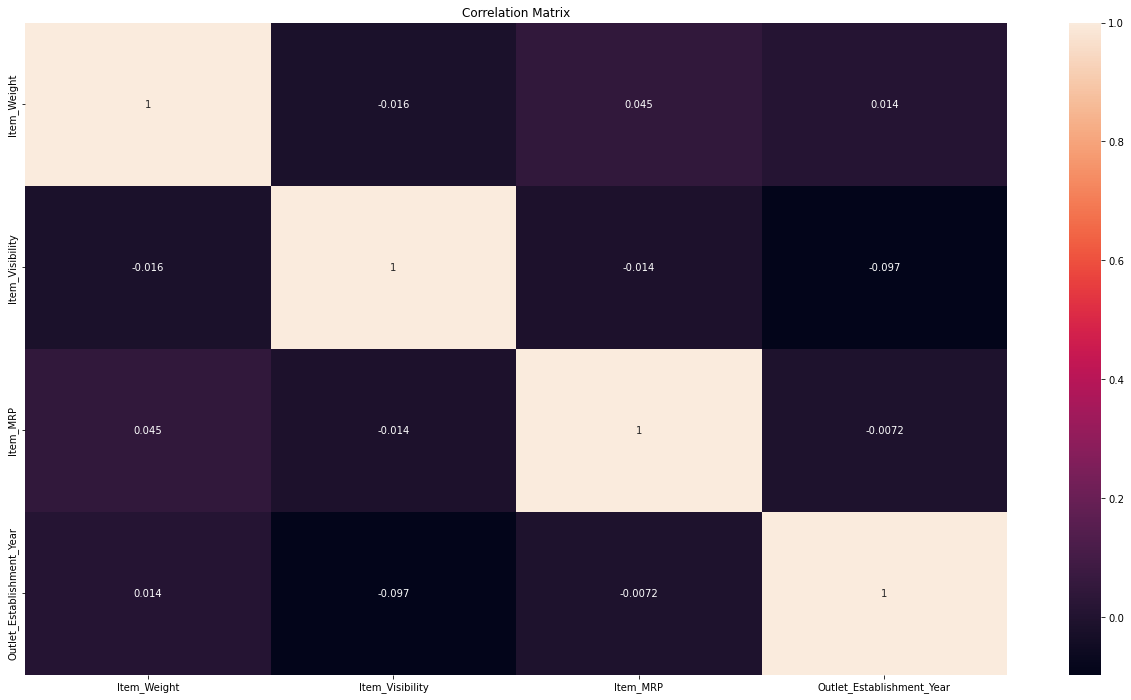

In [46]:
#Visualising heatmap for corr_mat and concluded that  all our features are not corelated
plt.figure(figsize=(22,12),facecolor="white")
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

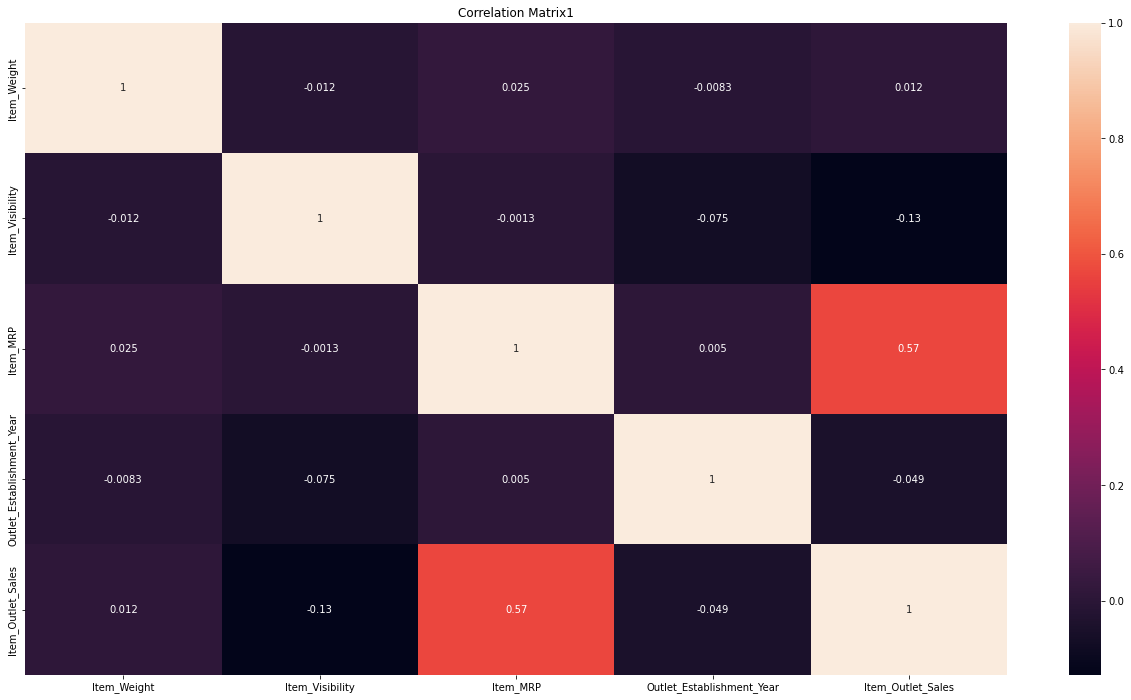

In [47]:
#Visualising heatmap for corr_mat and concluded that  all our features are not corelated
plt.figure(figsize=(22,12),facecolor="white")
sns.heatmap(corr_mat1,annot=True)
plt.title("Correlation Matrix1")
plt.show

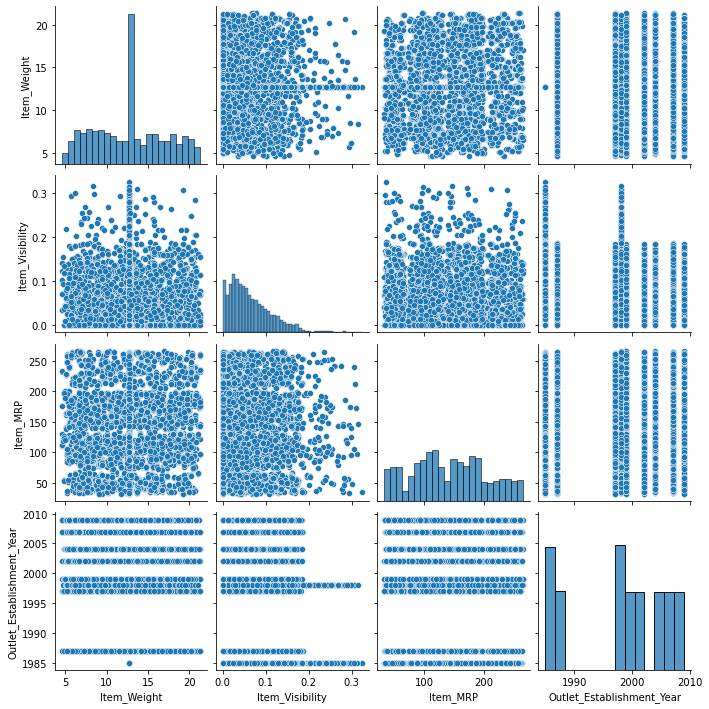

In [48]:
sns.pairplot(df)

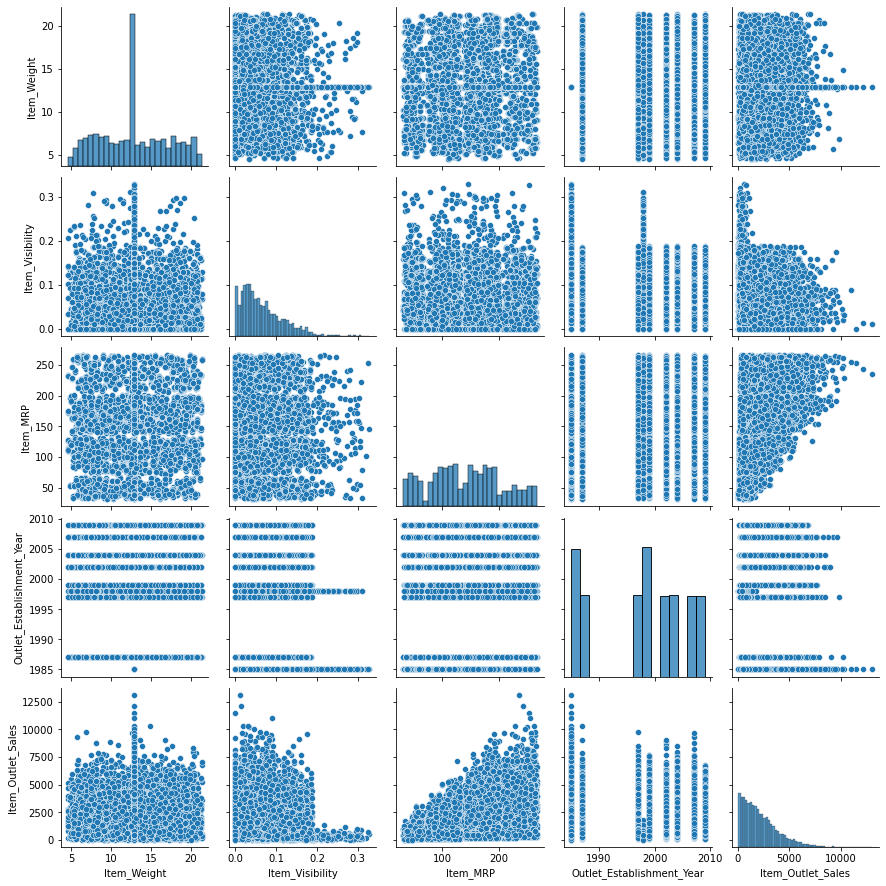

In [49]:
sns.pairplot(df1)

In [50]:
df.skew()

Item_Weight                  0.142813
Item_Visibility              1.238312
Item_MRP                     0.136182
Outlet_Establishment_Year   -0.396306
dtype: float64

In [51]:
df1.skew()

Item_Weight                  0.090561
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

In [52]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Small,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [53]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [54]:
#by using label_encoder i have converted my Sex,Cabin and Embarked columns from object to numeric
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['Item_Identifier']= label_encoder.fit_transform(df['Item_Identifier'])
df['Item_Fat_Content']= label_encoder.fit_transform(df['Item_Fat_Content'])
df['Item_Type']= label_encoder.fit_transform(df['Item_Type'])
df['Outlet_Identifier']= label_encoder.fit_transform(df['Outlet_Identifier'])
df['Outlet_Size']= label_encoder.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type']= label_encoder.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type']= label_encoder.fit_transform(df['Outlet_Type'])

In [55]:
# Encode labels in column 'species'.
df1['Item_Identifier']= label_encoder.fit_transform(df1['Item_Identifier'])
df1['Item_Fat_Content']= label_encoder.fit_transform(df1['Item_Fat_Content'])
df1['Item_Type']= label_encoder.fit_transform(df1['Item_Type'])
df1['Outlet_Identifier']= label_encoder.fit_transform(df1['Outlet_Identifier'])
df1['Outlet_Size']= label_encoder.fit_transform(df1['Outlet_Size'])
df1['Outlet_Location_Type']= label_encoder.fit_transform(df1['Outlet_Location_Type'])
df1['Outlet_Type']= label_encoder.fit_transform(df1['Outlet_Type'])

In [56]:
#Removing Outliers
from scipy import stats

z = np.abs(stats.zscore(df))
index = (np.where(z > 3)[0])

df = df.drop(df.index[index])

In [57]:
df.shape

(5525, 11)

In [59]:
#Removing Outliers
from scipy import stats

z = np.abs(stats.zscore(df1))
index = (np.where(z > 3)[0])

df1 = df1.drop(df1.index[index])

In [60]:
df1.shape

(8222, 12)

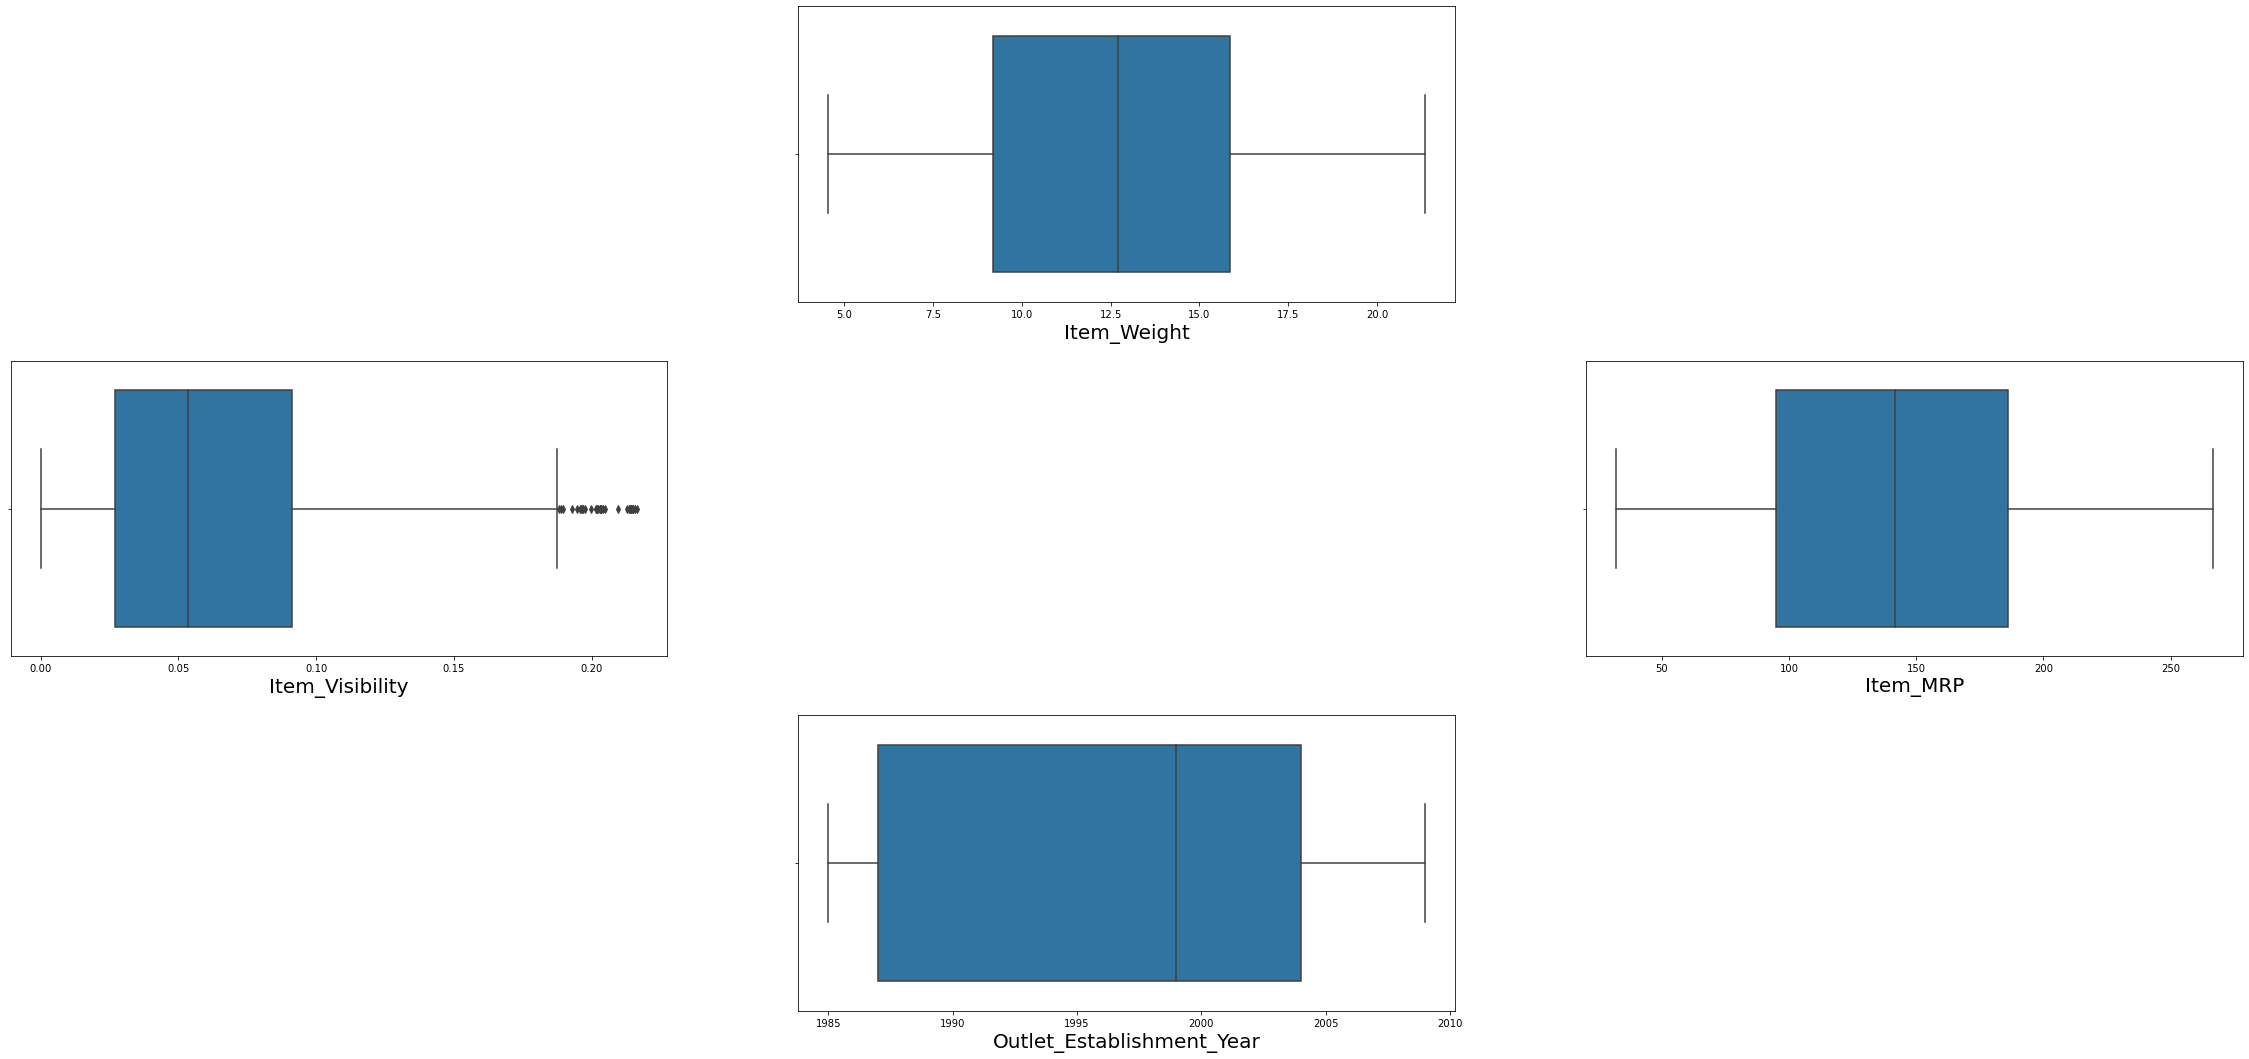

In [61]:
#plotting distribution plot for my dataframe to check and remove outliers
plt.figure(figsize=(40,25),facecolor="white")
plotnumber = 1

for column in df:
    
    if(df[column].dtype == np.float64 or df[column].dtype == np.int64):
        if plotnumber<=12:
            ax = plt.subplot(4,3,plotnumber)
            sns.boxplot(df[column])
            plt.xlabel(column,fontsize=20)
       
    plotnumber +=1
plt.show()

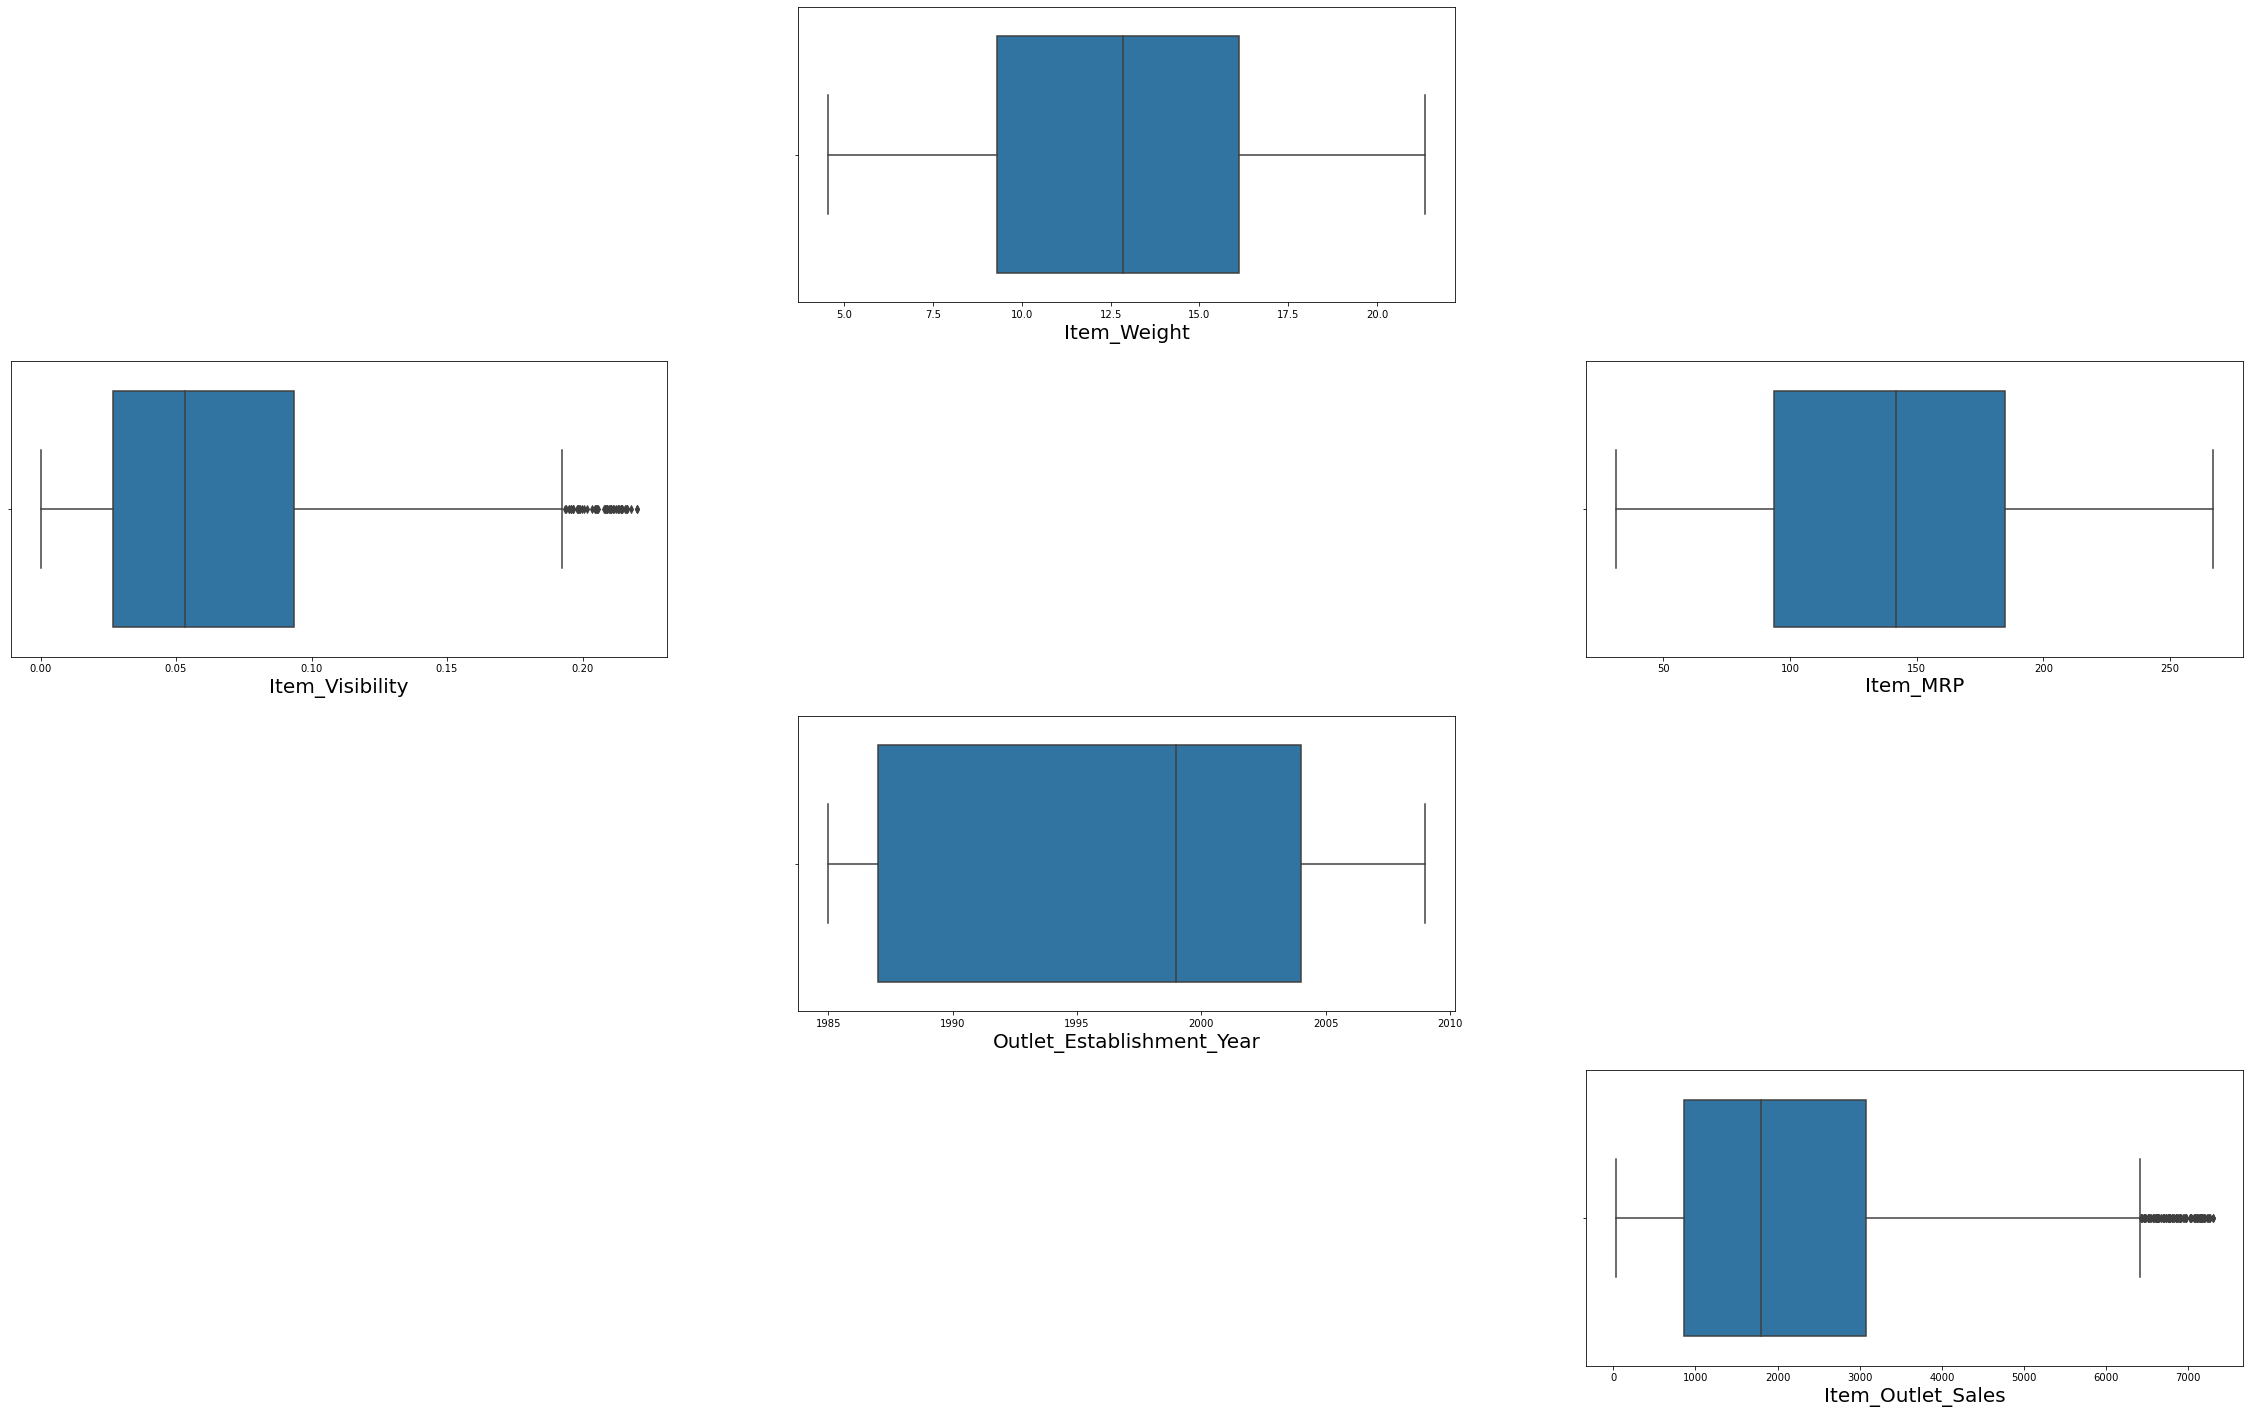

In [62]:
#plotting distribution plot for my dataframe to check and remove outliers
plt.figure(figsize=(40,25),facecolor="white")
plotnumber = 1

for column in df1:
    
    if(df1[column].dtype == np.float64 or df1[column].dtype == np.int64):
        if plotnumber<=12:
            ax = plt.subplot(4,3,plotnumber)
            sns.boxplot(df1[column])
            plt.xlabel(column,fontsize=20)
       
    plotnumber +=1
plt.show()

In [64]:
#seperating my features and label
X = df1.drop('Item_Outlet_Sales',axis=1)
y = df1['Item_Outlet_Sales']

X1 = df

In [65]:
# to scale my features.
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()

X_scaled = scaler.fit_transform(X)

In [66]:
scaler1 =StandardScaler()

X1_scaled = scaler1.fit_transform(X1)

In [67]:
#checking for is there any VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns
vif

,VIF,Features
0,1.014599,Item_Identifier
1,1.004123,Item_Weight
2,1.028649,Item_Fat_Content
3,1.030144,Item_Visibility
4,1.019816,Item_Type
5,1.002884,Item_MRP
6,4.134004,Outlet_Identifier
7,1.283121,Outlet_Establishment_Year
8,1.704276,Outlet_Size
9,5.460259,Outlet_Location_Type


In [68]:
#checking for is there any VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X1_scaled

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif1 = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif1["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif1["Features"] = X1.columns
vif1

,VIF,Features
0,1.016939,Item_Identifier
1,1.007398,Item_Weight
2,1.030863,Item_Fat_Content
3,1.031042,Item_Visibility
4,1.025487,Item_Type
5,1.006120,Item_MRP
6,4.117224,Outlet_Identifier
7,1.289098,Outlet_Establishment_Year
8,1.703914,Outlet_Size
9,5.501632,Outlet_Location_Type


In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.20,random_state=2)

In [70]:
from xgboost import XGBRegressor
xgb = XGBRegressor()  #Instantiate KNN with k=3
xgb.fit(x_train,y_train) #Call the fit method of KNN to train the model or to learn the parameters of model
y_predict = xgb.predict(x_test) #Predict

In [71]:
from sklearn.metrics import r2_score, roc_auc_score, mean_squared_error
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_predict))
r2_xgb = r2_score(y_test, y_predict)

In [72]:
print("The root mean Sq error calculated from the base model is:",rmse_xgb)
print("The r2-score is:",r2_xgb)

The root mean Sq error calculated from the base model is: 1102.916856053851
The r2-score is: 0.5193508410875566


In [73]:
from sklearn.neighbors import KNeighborsRegressor  # k=3
knn = KNeighborsRegressor(n_neighbors = 3)  #Instantiate KNN with k=3
knn.fit(x_train,y_train) #Call the fit method of KNN to train the model or to learn the parameters of model
y_predict = knn.predict(x_test) #Predict

In [74]:
from sklearn.metrics import r2_score, roc_auc_score, mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_predict))
r2 = r2_score(y_test, y_predict)

In [75]:
print("The root mean Sq error calculated from the base model is:",rmse)
print("The r2-score is:",r2)

The root mean Sq error calculated from the base model is: 1184.4687934350113
The r2-score is: 0.4456425549282841


In [76]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(x_train , y_train)
pred = lr.predict(x_test)

In [77]:
from sklearn.metrics import r2_score, roc_auc_score, mean_squared_error
rmse1 = np.sqrt(mean_squared_error(y_test, pred))
r2_1 = r2_score(y_test, pred)

In [78]:
print("The root mean Sq error calculated from the base model is:",rmse1)
print("The r2-score is:",r2_1)

The root mean Sq error calculated from the base model is: 1133.0816863225612
The r2-score is: 0.49269974712720155


In [79]:
# using Decision tree regressor to my dataset
from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor() #Instantiate the LogisticRegression object
DT.fit(x_train,y_train) #Call the fit method of logistic regression to train the model or to learn the parameters of model
y_pred = DT.predict(x_test) #Predict

In [80]:
from sklearn.metrics import r2_score, roc_auc_score, mean_squared_error
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred))
r2_2 = r2_score(y_test, y_pred)

In [81]:
print("The root mean Sq error calculated from the base model is:",rmse2)
print("The r2-score is:",r2_2)

The root mean Sq error calculated from the base model is: 1447.9968001028194
The r2-score is: 0.1715279856687313


In [82]:
#Building SVR Model
from sklearn.svm import SVR
svr = SVR() #Instantiate the LogisticRegression object
svr.fit(x_train,y_train) #Call the fit method of logistic regression to train the model or to learn the parameters of model
y_pred = svr.predict(x_test) #Predict

In [83]:
rmse3 = np.sqrt(mean_squared_error(y_test, y_pred))
r2_3 = r2_score(y_test, y_pred)

In [84]:
print("The root mean Sq error calculated from the base model is:",rmse3)
print("The r2-score is:",r2_3)

The root mean Sq error calculated from the base model is: 1545.8200745209847
The r2-score is: 0.05580754838716384


In [85]:
#Building RandomForest Model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor() #Instantiate the LogisticRegression object
rf.fit(x_train,y_train) #Call the fit method of logistic regression to train the model or to learn the parameters of model
y_pred = rf.predict(x_test) #Predict

In [86]:
rmse4 = np.sqrt(mean_squared_error(y_test, y_pred))
r2_4 = r2_score(y_test, y_pred)

In [87]:
print("The root mean Sq error calculated from the base model is:",rmse4)
print("The r2-score is:",r2_4)

The root mean Sq error calculated from the base model is: 1067.6271140906936
The r2-score is: 0.5496171673429606


In [88]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [89]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [90]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)

In [91]:
rf_Grid.fit(x_train, y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [92]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 48}

In [93]:
rf_Grid.best_score_

0.5780999037638083

In [94]:
#Building RandomForest Model
from sklearn.ensemble import RandomForestRegressor
rf1 = RandomForestRegressor(n_estimators=64,bootstrap=True,max_depth=4,max_features='auto',min_samples_leaf=1,min_samples_split=2) #Instantiate the LogisticRegression object
rf1.fit(x_train,y_train) #Call the fit method of logistic regression to train the model or to learn the parameters of model
y_pred = rf1.predict(x_test)

In [95]:
rmse5 = np.sqrt(mean_squared_error(y_test, y_pred))
r2_5 = r2_score(y_test, y_pred)

In [96]:
print("The root mean Sq error calculated from the base model is:",rmse5)
print("The r2-score is:",r2_5)

The root mean Sq error calculated from the base model is: 1025.4089004810155
The r2-score is: 0.584532741861615


In [97]:
#Saving the model in pkl file
import joblib
joblib.dump(rf1,"bigdata.pkl")

['bigdata.pkl']

In [98]:
model = joblib.load("bigdata.pkl")

In [99]:
#Predicting the saved model
prediction = model.predict(X1_scaled)

In [100]:
#Converting the result into DataFrame
prediction = pd.DataFrame(prediction)

In [101]:
#Saving the result into CSV
prediction.to_csv("Results_RF.csv",index=True)